<a href="https://colab.research.google.com/github/subhradipXD/Sentiment-Analysis/blob/main/MRSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Sentimental Analysis Case Study**

## **Fetching Data**

In [38]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/IMDB Dataset.csv')

In [39]:
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [40]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## **Text Cleaning**

In [41]:
df['sentiment'].replace({'positive':1, 'negative':0},inplace = True)

In [42]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [43]:
import re
clean = re.compile('<.*?>')
re.sub(clean, '' ,df.iloc[2].review)

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [44]:
# remove html tags

def clean_text(text):
  clean = re.compile('<.*?>')
  return re.sub(clean, '' ,text)

In [45]:
df['review'] = df['review'].apply(clean_text)

In [46]:
# convert into lower case

def convert_lower_text(text):
  return text.lower()

In [47]:
df['review'] = df['review'].apply(convert_lower_text)

In [48]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [49]:
#remove special character

def remove_special_char(text):
  x = ''
  for i in text:
    if i.isalnum():
      x=x+i;
    else:
      x=x+' '
  return x

In [50]:
df['review'] = df['review'].apply(remove_special_char)

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
from nltk.corpus import stopwords

In [53]:
def remove_stopwords(text):
  x=[]
  for i in text.split():
    if i not in stopwords.words('english'):
      x.append(i)

  y = x[:]
  x.clear()
  return y

In [54]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
df['review'] = df['review'].apply(remove_stopwords)

In [56]:
df['review']

0        [one, reviewers, mentioned, watching, 1, oz, e...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, side, mal...
49999    [one, expects, star, trek, movies, high, art, ...
Name: review, Length: 50000, dtype: object

In [57]:
# Steamming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [58]:
y = []
def stem_words(text):
  for i in text:
    y.append(ps.stem(i))

  z=y[:]
  y.clear()
  return z

In [59]:
df['review'] = df['review'].apply(stem_words)

In [60]:
def join_back(text):
  return " ".join(text)

In [61]:
df['review'] = df['review'].apply(join_back)

In [62]:
df['review']

0        one review mention watch 1 oz episod hook righ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

## **Tf-Idf Vectorizer**

**TF-IDF consists of two main components:** Term Frequency (TF) and Inverse Document Frequency (IDF), which are combined to assign a weight to each term in a document. Let's break down how TF-IDF works:

**1. Term Frequency (TF):**

Term Frequency measures how often a term (word) appears in a specific document.
It is calculated for each term in a document using the following formula:

# TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)


The result is a value between 0 and 1, where 1 represents a high frequency of the term in the document.

**2. Inverse Document Frequency (IDF):**

Inverse Document Frequency measures the importance of a term across the entire corpus.
It is calculated for each term in the corpus using the following formula:

# IDF(t) = log_e(Total number of documents in the corpus / Number of documents containing term t)

The IDF value is higher for terms that appear in fewer documents across the corpus, indicating their importance.

**3. TF-IDF Score:**

The TF-IDF score for a term in a document is obtained by multiplying its TF and IDF values:

#TF-IDF(t, d) = TF(t, d) * IDF(t)

The TF-IDF score reflects the importance of a term within a specific document while considering its rarity across the entire corpus. Here are some key points to understand about TF-IDF:

**High TF-IDF Score**: A high TF-IDF score suggests that the term is both frequent in the document and unique to that document. Such terms are considered important for that specific document.

**Low TF-IDF Score:** A low TF-IDF score indicates that the term is either common in the entire corpus or not prevalent in the document. These terms are considered less important for distinguishing the document's content.

**Normalization:** To prevent bias towards longer documents, it's common to normalize TF by dividing it by the total number of terms in the document. This is called TF normalization.

**Logarithmic Scaling:** The IDF is often calculated with a logarithmic scaling factor to reduce the impact of extremely rare terms.

**Vector Representation:** After calculating TF-IDF scores for all terms in all documents, you can represent each document as a TF-IDF vector, where each dimension corresponds to a term, and the value in each dimension is the TF-IDF score for that term.

In [63]:
#tf-Idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['review'])
y =  df['sentiment']

In [64]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,)
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
#making predictions
y_pred = classifier.predict(x_test)
#model accuracy
print("Model Accuracy : {}%".format((y_pred == y_test).mean()))
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

Model Accuracy : 0.8513%
[[4234  737]
 [ 750 4279]]


In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[4279  750]
 [ 737 4234]]


Confusion matrix, without normalization
[[4279  750]
 [ 737 4234]]


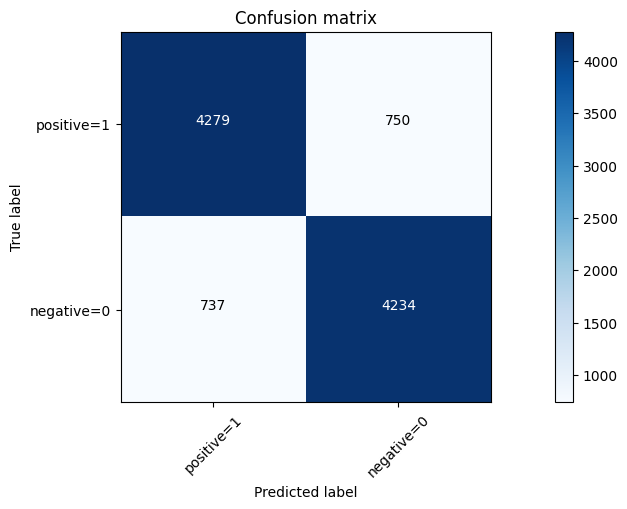

In [68]:
# Compute confusion matrix
import numpy as np
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')